Purpose: To find projection of $x_{0}$ onto Manifold of Stifel!!! Denote Manifold of Stifel as $S{nk}$. $n =3, k =2$


Assumptions: $x_{0}$ is located near Manofold of Stifel (The distance between $x_{0}$ and  $S{nk}$ is less $\dfrac{2}{(k^{2} + 3k)^{0.5}}$)


In [3]:
import math as m 

import matplotlib.pyplot as plt

import numpy as np

from numpy import linalg

import random





### Вводим сразу две глобальные переменные, отвечающие числу столбцов и строк в  исходной матрице

In [4]:
row = 10 # Число строк
col = 5 # Число столбцов

## Пишем функции: каждый градиент,  максимальная по модулю компонента и каждое уравнение из соответствующей системы

In [5]:
def sqrtTrAA (x):
    return (np.linalg.norm(x))

def maximum(x):
    va = np.zeros((col, col))
    for i in range(col):
        for j in range(col):
            va[i][j] = abs(g(x, i, j))
    ind = np.unravel_index(np.argmax(va, axis=None), va.shape)
    
    return ind
    

def grad(x, i, j):
    gr = np.zeros_like(x)
    for k in range(row):
        gr[row*j+k] += x[row*i + k]
        gr[row*i+k] += x[row*j + k]
    return gr

def g(x, i, j):
    res = 0
    for k in range(row):
        res += x[row*i + k]*x[row*j + k]
    if(i==j):
        res -=1
    return res


def norma(x):
    return (np.linalg.norm(x))

## Ортогонализация Грамма-Шмидта

Проделываем метод ортогонализации Грамма-Шмидта, чтобы получить "псевдортогональную" матрицу


In [6]:
# Программа взята  и немного переделана с http://algowiki-project.org/ru/Классический_метод_ортогонализации

def GramSchmidt(*a):
    
    k = len(a[0])
    N = len(a);
    
    b = [[0] * k for i in range(N)] # Не вникал в суть, непонятно, что это!!!
    b[0]=a[0]/norma(a[0])
    
    for i in range(1,N):
        sum=a[i]
        for j in range(0,i):
            scolar_ab=0
            scolar_bb=0
            proj=[i for i in range(k)]
            for n in range(k):
                scolar_ab+=b[j][n]*a[i][n]
                scolar_bb+=b[j][n]*b[j][n]
            for n in range(k):
                proj[n]=(scolar_ab/scolar_bb)*b[j][n]
            for n in range(k):
                sum[n]-=proj[n]
        b[i] = sum
        
        b[i] = b[i]/norma(b[i])
    return b;

l1=[random.randrange(0,100) for i in range(10)]
l2=[random.randrange(0,100) for i in range(10)]
l3=[random.randrange(0,100) for i in range(10)]
l4=[random.randrange(0,100) for i in range(10)]
l5=[random.randrange(0,100) for i in range(10)]




#print(l1,l2,l3,l4,l5)
(GramSchmidt(l1,l2,l3,l4,l5))




[array([0.40577361, 0.36839973, 0.2829737 , 0.34704322, 0.04271301,
        0.40043448, 0.48586051, 0.2829737 , 0.09076515, 0.11212166]),
 array([ 0.18187044,  0.13043745, -0.21305058,  0.04910995,  0.27172317,
        -0.07477579, -0.24936155, -0.17669452,  0.77282554,  0.36334629]),
 array([-0.09720552, -0.204885  , -0.19938582,  0.4285409 ,  0.26277245,
        -0.40594239,  0.3270202 , -0.05675938, -0.31383704,  0.531672  ]),
 array([-0.27997547, -0.58370897,  0.07517988, -0.0414397 , -0.02635969,
         0.0982952 ,  0.12427424,  0.64338313,  0.35759672,  0.07687776]),
 array([-0.32517142,  0.2390729 ,  0.72322342, -0.23412772, -0.1326343 ,
        -0.22736931, -0.03352346, -0.06633582,  0.04846036,  0.42670653])]

## Подготовка к методу альтернативных проекций

$1.$ Ищем представителя  $S{n,k}$ . Назовем его $x_0$. "Развернем" его сразу в вектор.

In [8]:
d = col # У Питона проблемы с "длинными" именами переменных
#print (col)

R = 2 / (((d)**2 + 3*d)**(0.5)) # ОПРЕДЕЛИЛИ РАДИУС ПРОКСИМАЛЬНОЙ ГЛАДКОСТИ
#print (R)


#y =  np.array((GramSchmidt(l1,l2,l3,l4,l5)))
y = [([0.28927313, 0.08264947, 0.1062636 , 0.23614133, 0.52541447,
        0.0354212 , 0.5844498 , 0.46637913, 0.07674593, 0.01180707]),
 ([-0.21230731,  0.16115107,  0.01502678,  0.37763607, -0.34268837,
         0.48202032,  0.07191454,  0.06555336,  0.57332861,  0.31331708]),
 ([ 0.00357467,  0.61144235, -0.17494334,  0.02439392,  0.24613026,
         0.32957917, -0.10443875, -0.18419198, -0.4858305 ,  0.38060123]),
 ([ 0.26610527, -0.33588364,  0.48148467, -0.40984166,  0.23094664,
         0.37665594, -0.00885575, -0.31535772,  0.13230254,  0.32300705]),
 ([ 0.66985936,  0.46985317, -0.10222485, -0.13504689, -0.10402712,
        -0.10752589, -0.11495211, -0.19849784,  0.40759897, -0.24637998])]
x0 = np.ravel(y) # Преобразование n-мерного массива к одномерному
x3 = x0
print (x0)
print (maximum(x0))
i, j = maximum(x0)
print(g(x0, i, j))
print(grad(x0,1,1))

p = y

result = open('Alternative_projection1.txt', 'w')
result1 = open('Bar_Coord.txt', 'w')
norma(x0)


[ 0.28927313  0.08264947  0.1062636   0.23614133  0.52541447  0.0354212
  0.5844498   0.46637913  0.07674593  0.01180707 -0.21230731  0.16115107
  0.01502678  0.37763607 -0.34268837  0.48202032  0.07191454  0.06555336
  0.57332861  0.31331708  0.00357467  0.61144235 -0.17494334  0.02439392
  0.24613026  0.32957917 -0.10443875 -0.18419198 -0.4858305   0.38060123
  0.26610527 -0.33588364  0.48148467 -0.40984166  0.23094664  0.37665594
 -0.00885575 -0.31535772  0.13230254  0.32300705  0.66985936  0.46985317
 -0.10222485 -0.13504689 -0.10402712 -0.10752589 -0.11495211 -0.19849784
  0.40759897 -0.24637998]
(3, 3)
-1.1965624935328378e-08
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.42461462  0.32230214
  0.03005356  0.75527214 -0.68537674  0.96404064  0.14382908  0.13110672
  1.14665722  0.62663416  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.   

2.236067975355386

$2.$ Выбираем точку $x$ такую, что $||x-x_{0}|| \leq  \dfrac{2}{(k^{2} + 3k)^{0.5}}$ Здесь $||x|| =  \sqrt{tr(A^{T}A)}$ У нас $||x-x_{0}|| \leq  \dfrac{2}{\sqrt{10}}$

In [9]:
x = [ 0.24927313,  0.09264947, 0.1062636,   0.23614133,  0.5341447, 0.0354212,
  0.5844498,   0.46937913,  0.2674593,  0.01180707, -0.2190731,  0.1715107,
  0.02502678,  0.35763607, -0.34268837,  0.48202032,  0.0991454,  0.0855336,
  0.57332861, 0.32331708,  0.00357467,  0.61144235, -0.1894334,  0.02439392,
  0.24613026,  0.32957917, -0.10443875, -0.2419198, -0.488305,   0.3960123,
  0.27610527, -0.32588364,  0.48148467, -0.40984166,  0.294664,  0.37665594,
 -0.00885575,  -0.3135772,  0.13230254,  0.32300705,  0.6885936,  0.4885317,
 -0.10222485, -0.13504689, -0.10402712, -0.10752589, -0.1135211, -0.1284,
  0.4259897, -0.2237998]
x4 = x

#h, g = maximum(x)
print (x)
print(x0)

# Норма разности  меньше 0.3
print (sqrtTrAA(x - x0))
print(norma(x))

[0.24927313, 0.09264947, 0.1062636, 0.23614133, 0.5341447, 0.0354212, 0.5844498, 0.46937913, 0.2674593, 0.01180707, -0.2190731, 0.1715107, 0.02502678, 0.35763607, -0.34268837, 0.48202032, 0.0991454, 0.0855336, 0.57332861, 0.32331708, 0.00357467, 0.61144235, -0.1894334, 0.02439392, 0.24613026, 0.32957917, -0.10443875, -0.2419198, -0.488305, 0.3960123, 0.27610527, -0.32588364, 0.48148467, -0.40984166, 0.294664, 0.37665594, -0.00885575, -0.3135772, 0.13230254, 0.32300705, 0.6885936, 0.4885317, -0.10222485, -0.13504689, -0.10402712, -0.10752589, -0.1135211, -0.1284, 0.4259897, -0.2237998]
[ 0.28927313  0.08264947  0.1062636   0.23614133  0.52541447  0.0354212
  0.5844498   0.46637913  0.07674593  0.01180707 -0.21230731  0.16115107
  0.01502678  0.37763607 -0.34268837  0.48202032  0.07191454  0.06555336
  0.57332861  0.31331708  0.00357467  0.61144235 -0.17494334  0.02439392
  0.24613026  0.32957917 -0.10443875 -0.18419198 -0.4858305   0.38060123
  0.26610527 -0.33588364  0.48148467 -0.4098

$3.$ Находим "максимальную" пару $i,j$ (при ней $g_{ij}$ -максимальна)  

In [10]:
#print (maximum(x0)) # И,действительно, x0 - на многообразии Штифеля
print (maximum(x))
i, j = maximum(x)
print(g(x, i, j))

(0, 1)
0.13767468470616873


In [26]:
 # Сохраняем, чтобы каждый раз не обновлять
x0 = x3
x = x4

## Метод альтернативных проекций


$4.$ Теперь делаем итерации метода "альтернативных проекций"


In [27]:
def Alternative_Projection(x,e): #На вход метода подаем точку (у которой будем искать псевдопроекцию на множество) и нужную точность
    dist = [] #  Массив,где храним расстояния от точек с алгоритма до начальной
    mass = [] # Храним эти точки
    s = 0
    result = open('Alternative_projection1.txt', 'w')
    
    x2 = []
    
    i, j = maximum(x)
    a = g(x, i, j)
    #print(a)

    c = 0 # ЧИСЛО ОПРЕАЦИЙ УМНОЖЕНИЯ (ДЕЛЕНИЯ) (деленное на раззмерность градиента)

    #for i in range (50):
    if (abs(a) < e):
        x2 = x
        #print(a)
    
    else:
        
        while (abs(a) > e):
        #for i in range (5):
            i, j = maximum(x) # НЕЛЬЗЯ ИХ МЕНЯТЬ НА ПРОТЯЖЕНИИ ВСЕЙ ПРОГРАММЫ!!!!
            a = g(x, i, j)
            gr = 0
            x1 = x
            #print (a,b)

            # Делаем шаг метода "альтернативных проекций". Зажимаем точку g(ij) = 0 на отрезке.
            # Вычисление градиента, по которому "прыгаем"

            #if (b == 11):
    
            gr = grad(x, i, j)
    
            if (a > 0):
    
                while (g(x, i, j) > 0):
                
                    x = x - R * gr
            
                    c = c + 1
            
                # МЕТОД ДЕЛЕНИЯ ОТРЕЗКА ПОПОЛАМ
            
                x2 = (x + x1)/2
        
                c = c + 1
    
                while (abs(g(x2, i, j)) > e):

                    x2 = (x + x1)/2
            
                    c = c + 1
            
                    if (g(x2, i, j) < 0):
                
                        x1 = x1
                        x = x2
                
                    if (g(x2, i, j) > 0):
                
                        x = x
                        x1 = x2
                
                    if (g(x2, i, j) == 0):
                
                        break  
            
            
                i = 0
                j = 0 
            
                for i in range (col): # Записываем g_{ij} в отдельный файлик
                    for j in range (i+1):
                    
                        result.write(str(g(x2, i, j))) # Записываем "новые" компонент для этой точки
                        result.write('\n')
            
                result.write('\n')
                result.write('\n')
          
        
            if (a < 0):
    
                while (g(x, i, j) < 0):

                    x = x + R * gr
            
                    c = c + 1
        
                # МЕТОД ДЕЛЕНИЯ ОТРЕЗКА ПОПОЛАМ
    
                x2 = (x + x1)/2
        
                c = c + 1
        
                while (abs(g(x2, i, j)) > e):
        
                    x2 = (x + x1)/2
            
                    c = c + 1
           
                    if ((g(x2, i, j)) < 0):
                
                        x = x
                        x1 = x2
            
                    if ((g(x2, i, j)) > 0):
                
                        x1 = x1
                        x = x2
                
                    if (g(x2, i, j) == 0):
                
                        break
            
       
                i = 0
                j = 0 
            
                for i in range (col): # Записываем g_{ij} в отдельный файлик
                    for j in range (i+1):
                    
                        result.write(str(g(x2, i, j))) # Записываем "новые" компонент для этой точки
                        result.write('\n')
            
                result.write('\n')
                result.write('\n')
            
             
            
            x = x2 # С этой точки снова запускаем метод "альтернативных проекций"
            i, j = maximum(x)
            
            v = norma(x2 - x0)
            dist.append(v)
            mass.append(s)
            
            a = g(x, i, j)
            
            s = s + 1 # Число итераций метода
            
            #print(i,j)

    result.close()
    
    return(x2,s,dist,mass,c)

    #Alternative_Projection(x, 10^(-8))  


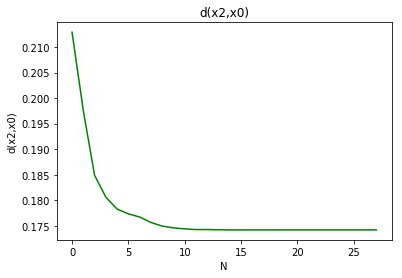

[ 0.22101985  0.09892658  0.08519967  0.22789773  0.56106119  0.01632364
  0.5705251   0.45889432  0.17558339  0.0141134  -0.23693721  0.15802555
  0.02414038  0.33927198 -0.37775071  0.48468415  0.0607161   0.05226965
  0.55901132  0.3266099   0.0109773   0.60969033 -0.18950094  0.04287474
  0.26909663  0.31572918 -0.07037628 -0.20597692 -0.47399042  0.38244521
  0.26729333 -0.33132842  0.47557076 -0.40796696  0.26569307  0.36900214
 -0.02251783 -0.3173414   0.14308942  0.31261497  0.67246625  0.47386327
 -0.10252866 -0.14796702 -0.12827712 -0.10888429 -0.13992549 -0.14994429
  0.41287836 -0.22359279]
558


In [28]:
y,s,dist,mass,c =(Alternative_Projection(x, 10**(-6)))

plt.plot(mass,dist,'g')                
plt.title('d(x2,x0)')     
plt.xlabel('N')              
plt.ylabel('d(x2,x0)') 
plt.show()
print(y)
print(c)


#print(norma(x - x0))
#print(norma(x0 - y))

## Сфера

Мы знаем, что многообразие Штифеля находится на сфере ( норма в "большом" пространстве определена следующим образом $||A|| = \sqrt{Tr(A^{T}A})$) радиуса - $\sqrt{k}$. Для точек, находящихся на нормали к сфере, а также проекцией которых на многобразие Штифеля является точка с этой нормали - мы точно знаем эту проецию. Сравним расстояние от "взволнованной"  до полученной в результате метода альтернативных проекций точки и до настоящей проекции!

In [22]:
x0 = np.array([0.15189493, 0.32474088, 0.43473376, 0.23046127, 0.37188069,
       0.22522351, 0.30902761, 0.29331435, 0.44520927, 0.24617454, 0.03432845, -0.09670922, -0.28438713, -0.03566316, -0.20544998,
        0.6183839 ,  0.54094511, -0.17717449, -0.22627829,  0.32786942 ,-0.19792752,  0.12321364, -0.34953868,  0.57812211, -0.05264843,
        0.23927971, -0.53821693,  0.17689924,  0.01802967,  0.32850893, -0.0947101 ,  0.48255337, -0.30840475,  0.27777633, -0.08865446,
       -0.58697694,  0.41862962, -0.18710623, -0.03996566,  0.14710803,0.69169314, -0.27477415,  0.1237155 ,  0.0847682 , -0.34131188,
       -0.27210892, -0.10877738, -0.00581481,  0.04288056,  0.46832303])


n = x0 / norma(x0) # нормаль к сфере в точке x0 (цетр сферы в 0)
#print (n)

x = x0 + (R*n)/2 # "Поколебали наш вектор по нормали" на небольшое расстояние от Многообразия Штифеля
#print(x)

Alternative_Projection(x, 10**(-7))

(array([ 0.15189493,  0.32474087,  0.43473375,  0.23046127,  0.37188068,
         0.22522351,  0.30902761,  0.29331435,  0.44520926,  0.24617454,
         0.03432845, -0.09670922, -0.28438713, -0.03566316, -0.20544998,
         0.61838389,  0.5409451 , -0.17717449, -0.22627829,  0.32786941,
        -0.19792752,  0.12321364, -0.34953867,  0.5781221 , -0.05264843,
         0.23927971, -0.53821692,  0.17689924,  0.01802967,  0.32850892,
        -0.0947101 ,  0.48255336, -0.30840475,  0.27777633, -0.08865446,
        -0.58697693,  0.41862961, -0.18710623, -0.03996566,  0.14710803,
         0.69169313, -0.27477415,  0.1237155 ,  0.0847682 , -0.34131187,
        -0.27210892, -0.10877738, -0.00581481,  0.04288056,  0.46832302]),
 5,
 [0.1414213561093447,
  0.12247448688470582,
  0.09999999976369343,
  0.07071067789177546,
  3.5760319058662084e-08],
 [0, 1, 2, 3, 4],
 125)

##  Проектор на касательную плоскость к многообразию

Пишем программу для оператора проекции вектора на касательную плоскость в точке $x_1$ Вот его формула $P_{T_{x_1}} = I - g^{'}(x_1) ((g^{'}(x_1)^T g^{'}(x_1))^{-1} g^{'}(x_1)^T $, где $g^{'}(x_1) = (g_{11}^{'}(x_1), \ldots, g_{kk}^{'}(x_1))$, где $k$ - число столбцов в исходной матрице.

In [15]:
def Projector(x,y): # Три аргумента: ПЕРВЫЙ - ЧТО ПРОЕЦИРУЕМ, ВТОРОЙ - точка НА КАСАТЕЛЬНОМ подпространстве
    
    D = [] # Матрица составленная из градиентов (в заголовке D = g'(y) - только пока ее строки - это гродиенты)
    o = [] #Порядок в котором идут градиенты (для проверки)
    for i in range (col):
        for j in  range(i+1):
            D.append(grad(y,j,i))
            o.append([j,i])
   
    D = np.array(D) 
    G = D.transpose() # Теперь G = g'(y)
    R = np.dot(D,G) #D*G
    K = linalg.inv(R) #обратная матрица к R
    L = np.dot(G,K)
    T= np.dot(L,D) # ВТОРОЕ СЛАГАЕМОЕ ПРОЕКТОРА!!!!
    I = np.mat(np.eye(col*row)) # ПЕРВОЕ СЛАГАЕМОЕ ПРОЕКТОРА (единичная матрица)
    T = np.matrix(T)
    x = np.mat(x)
    x = x.transpose()
    
    P = I - T # ПРОЕКТОР!!!
    
    
    z = np.dot(P,x) # Проекция
    
    return(P)
            
        






Проверяем, как работает проектор

In [16]:
print(Projector(x,x0))
#a = [[1,2],[2,3]]
#b = [[1],[2]]
#print(np.dot(a,b))

[[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0.10144176  0.0402976  -0.01814377 ...  0.90810309 -0.09042279
  -0.01962908]
 [-0.1539741   0.061166   -0.02753964 ... -0.09042279  0.87249352
  -0.0378085 ]
 [-0.08513862  0.0338212  -0.0152278  ... -0.01962908 -0.0378085
   0.63184396]]


## Теперь пишем метод для поиска самой проекции (чередуем метод альтернативных проекций и проекцию на касательное подпространство)

In [52]:
def Result(x):
    
    p = x
    
    for i in range(100):
    
        y = Alternative_Projection(p,10**(-7)) #Делаем шаг метода альтернативных проекций
        
        r = np.mat(y) # Чтобы дальше удобнее было работать как с матрицей
        s = r.transpose() # Теперь y есть и как столбик
    
        # p = s + Projector(x - y,y) #  Теперь для этой точки будем запускать метод Альтернативных проекций        
        
        print(s, Projector((x - y) , y))

        p = np.array(p)
        p = np.ravel(p)
    
    
    return (p)
        

In [55]:
print(Result(x))
print(norma(x))


#print(type(x))
#print(type(Result(x)))

#print(grad(Result(x),1,1))
#print(g(Result(x),1,1))

#print(len(x))
#print(len(Result(x)))



[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0

[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0

[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0

 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0.10144176  0.0402976  -0.01814377 ...  0.90810309 -0.09042279
  -0.01962908]
 [-0.1539741   0.061166   -0.02753964 ... -0.09042279  0.87249352
  -0.0378085 ]
 [-0.08513862  0.0338212  -0.0152278  ... -0.01962908 -0.0378085
   0.63184396]]
[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 

 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0.10144176  0.0402976  -0.01814377 ...  0.90810309 -0.09042279
  -0.01962908]
 [-0.1539741   0.061166   -0.02753964 ... -0.09042279  0.87249352
  -0.0378085 ]
 [-0.08513862  0.0338212  -0.0152278  ... -0.01962908 -0.0378085
   0.63184396]]
[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 

 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0.10144176  0.0402976  -0.01814377 ...  0.90810309 -0.09042279
  -0.01962908]
 [-0.1539741   0.061166   -0.02753964 ... -0.09042279  0.87249352
  -0.0378085 ]
 [-0.08513862  0.0338212  -0.0152278  ... -0.01962908 -0.0378085
   0.63184396]]
[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 

 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0.10144176  0.0402976  -0.01814377 ...  0.90810309 -0.09042279
  -0.01962908]
 [-0.1539741   0.061166   -0.02753964 ... -0.09042279  0.87249352
  -0.0378085 ]
 [-0.08513862  0.0338212  -0.0152278  ... -0.01962908 -0.0378085
   0.63184396]]
[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 

 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0.10144176  0.0402976  -0.01814377 ...  0.90810309 -0.09042279
  -0.01962908]
 [-0.1539741   0.061166   -0.02753964 ... -0.09042279  0.87249352
  -0.0378085 ]
 [-0.08513862  0.0338212  -0.0152278  ... -0.01962908 -0.0378085
   0.63184396]]
[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 

[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0

[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0

[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0

[[ 0.15189493]
 [ 0.32474087]
 [ 0.43473375]
 [ 0.23046127]
 [ 0.37188068]
 [ 0.22522351]
 [ 0.30902761]
 [ 0.29331435]
 [ 0.44520926]
 [ 0.24617454]
 [ 0.03432845]
 [-0.09670922]
 [-0.28438713]
 [-0.03566316]
 [-0.20544998]
 [ 0.61838389]
 [ 0.5409451 ]
 [-0.17717449]
 [-0.22627829]
 [ 0.32786941]
 [-0.19792752]
 [ 0.12321364]
 [-0.34953867]
 [ 0.5781221 ]
 [-0.05264843]
 [ 0.23927971]
 [-0.53821692]
 [ 0.17689924]
 [ 0.01802967]
 [ 0.32850892]
 [-0.0947101 ]
 [ 0.48255336]
 [-0.30840475]
 [ 0.27777633]
 [-0.08865446]
 [-0.58697693]
 [ 0.41862961]
 [-0.18710623]
 [-0.03996566]
 [ 0.14710803]
 [ 0.69169313]
 [-0.27477415]
 [ 0.1237155 ]
 [ 0.0847682 ]
 [-0.34131187]
 [-0.27210892]
 [-0.10877738]
 [-0.00581481]
 [ 0.04288056]
 [ 0.46832302]] [[ 0.71304636  0.08240817 -0.15313533 ... -0.10144176 -0.1539741
  -0.08513862]
 [ 0.08240817  0.72809693 -0.0419855  ...  0.0402976   0.061166
   0.0338212 ]
 [-0.15313533 -0.0419855   0.65427039 ... -0.01814377 -0.02753964
  -0.0152278 ]
 ...
 [-0


## "Барицентрический" метод

[ 0.22092683  0.09926497  0.08466862  0.2279995   0.56126431  0.01564541
  0.57047788  0.45908832  0.17472526  0.01366908 -0.23542269  0.15751655
  0.02480757  0.33880581 -0.3776779   0.48428878  0.0611223   0.05253525
  0.56080621  0.32585915  0.00937954  0.60952723 -0.18968667  0.04388564
  0.26821551  0.31646564 -0.07026304 -0.20561599 -0.47372215  0.38309793
  0.26729709 -0.33123723  0.47555933 -0.40792599  0.26683001  0.36888305
 -0.02199236 -0.31700426  0.14216652  0.31275269  0.67305112  0.47423618
 -0.10252013 -0.14869237 -0.12708167 -0.10900923 -0.14008092 -0.15046447
  0.4114331  -0.22340605]
8.773103855989894e-07
3116
615


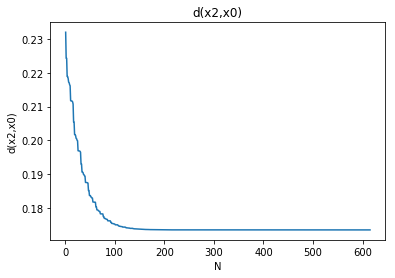

<function TextIOWrapper.close()>

In [17]:
G = 0

x0 = x3
x = x4
x3 = x0
x4 = x
dist = [] #  Массив,где храним расстояния от точек с алгоритма до начальной
mass = [] # Храним эти точки

a, b = maximum(x)
h = g(x,a,b)

k = 0 # Число операций умножения(деления), деленное на размерность градиента
l = 0 # Число итераций
#for k in range (20):
while (abs(h) > 10**(-6)):
    
    G = 0
    
    for i in range (col):
        for j in range (i+1): 
            G = G + abs(g(x,i,j))
            
    a, b = maximum(x)
    H = abs(g(x, a, b))/(2**(0.5))
    
    k = k + 1
    
    y = x # Переписываем x в у для того, чтобы потом брать градиент от y на каждой итерации
    
    for i in range (col):
        
        for j in range (i+1): 
            
            if (g(y,i,j) < 0):
                s = 1
            else:
                s = -1
        
            x = x + H * (s*abs(g(y,i,j))*grad(y,i,j))/(norma(grad(y,i,j)) * G)
            l = l + 1
            v = norma(x-x0)
            dist.append(v)
            mass.append(l)
            
            k = k + 5
    
    a, b = maximum(x)
    h = g(x,a,b)
    
    
    result1.write('NEW DISTANCE')
    result1.write(str(sqrtTrAA(x-x0))) # Расстояние от точки до начальной, лежащей на многообразии Штифеля 
    result1.write('\n')
    
    result1.write('1. ')
    result1.write(str(g(x, 0, 0))) # Записываем "новые" компонент для этой точки
    result1.write('\n')
            
             
    result1.write('2. ')
    result1.write(str(g(x, 0, 1))) # Записываем "новые" компонент для этой точки
    result1.write('\n')

             
    result1.write('3. ')
    result1.write(str(g(x, 1, 1))) # Записываем "новые" компонент для этой точки
    result1.write('\n')
    result1.write('\n')

print (x)

i,j = maximum(x)
print (g(x,i,j))

print(k)

print(l)



plt.plot(mass,dist)                
plt.title('d(x2,x0)')     
plt.xlabel('N')              
plt.ylabel('d(x2,x0)') 
plt.show()


           
    
result1.close


            
    
    

In [2]:

result1.close

<function TextIOWrapper.close()>

In [35]:
x = np.array([ 0.99160818,  0.11011251, -0.02958106, -0.03505369,  0.54144738,  0.84003015])
print (x)

[ 0.99160818  0.11011251 -0.02958106 -0.03505369  0.54144738  0.84003015]


## ТЕСТЫ

In [7]:
# ТЕСТ!!!!! КОМПОНЕНТА 11, a<0
x = np.array([ 0.99160818,  0.11011251, -0.02958106, -0.03505369,  0.54144738,  0.84003015])

a, b = maximum(x) # НЕЛЬЗЯ ИХ МЕНЯТЬ НА ПРОТЯЖЕНИИ ВСЕЙ ПРОГРАММЫ!!!!
gr = 0
x1 = x
#print (a,b)

# Делаем шаг метода "альтернативных проекций". Зажимаем точку g(ij) = 0 на отрезке.
# Вычисление градиента, по которому "прыгаем"

if (b == 11):
    
    gr = np.array([2*x[0], 2*x[1], 2*x[2], 0, 0, 0])
    
    if (a < 0):
    
        while ((x[0]*x[0] + x[1]*x[1] + x[2]*x[2] - 1) < 0):

            x = x + R * gr
        
        print (x[0]*x[0] + x[1]*x[1] + x[2]*x[2] - 1)
            
        # МЕТОД ДЕЛЕНИЯ ОТРЕЗКА ПОПОЛАМ
    
        x2 = (x + x1)/2
        
        while (abs(x2[0]*x2[0] + x2[1]*x2[1] + x2[2]*x2[2] - 1) > 10**(-4)):
        
            x2 = (x + x1)/2
           
            if ((x2[0]*x2[0] + x2[1]*x2[1] + x2[2]*x2[2] - 1) < 0):
                
                x = x
                x1 = x2
            
            if ((x2[0]*x2[0] + x2[1]*x2[1] + x2[2]*x2[2] - 1) > 0):
                
                x1 = x1
                x = x2
                
            if ((x2[0]*x2[0] + x2[1]*x2[1] + x2[2]*x2[2] - 1) == 0):
                
                break
            
            print ((x2[0]*x2[0] + x2[1]*x2[1] + x2[2]*x2[2] - 1))
        
    
print (maximum (x2))

4.110772977966728
1.6550151476445776
0.7260222084671433
0.3362472328743362
0.16004011857691003
0.07660665480294182
0.036057446259643466
0.016074722823915977
0.0061563313150325705
0.0012153781128358965
-0.0012505378502010167
-1.7959921854382443e-05
(4.467940050312258e-05, 22)


In [12]:
# ТЕСТ!!!!! КОМПОНЕНТА 22, a<0

x = np.array([ 0.99160818,  0.11011251, -0.02958106, -0.03498617,  0.54040434,  0.83841193])
a, b = maximum(x) # НЕЛЬЗЯ ИХ МЕНЯТЬ НА ПРОТЯЖЕНИИ ВСЕЙ ПРОГРАММЫ!!!!
gr = 0
x1 = x
#print (a,b)

# Делаем шаг метода "альтернативных проекций". Зажимаем точку g(ij) = 0 на отрезке.
# Вычисление градиента, по которому "прыгаем"
if (b == 22):
    
    gr = np.array([0, 0, 0, 2*x[3], 2*x[4], 2*x[5]])
    
    if (a < 0): 

        while ((x[3]*x[3] + x[4]*x[4] + x[5]*x[5] - 1) < 0): 

            x = x + R * gr 

        # МЕТОД ДЕЛЕНИЯ ОТРЕЗКА ПОПОЛАМ 

        x2 = (x + x1)/2
        

        
        while (abs(x[3]*x[3] + x[4]*x[4] + x[5]*x[5] - 1) > 10**(-4)): 
        
            x2 = (x + x1)/2
    
            
            if ((x2[3]*x2[3] + x2[4]*x2[4] + x2[5]*x2[5] - 1) < 0): 

                x = x
                x1 = x2

            if ((x2[3]*x2[3] + x2[4]*x2[4] + x2[5]*x2[5] - 1) > 0): 

                x1 = x1
                x = x2

            if ((x2[3]*x2[3] + x2[4]*x2[4] + x2[5]*x2[5] - 1) == 0): 
                
                break
            
            i = i + 1
            
            print ((x2[3]*x2[3] + x2[4]*x2[4] + x2[5]*x2[5] - 1))

    print (x2)
    print (maximum (x2))


1.6547722690793725
0.7258643133990581
0.33612499409503305
0.15993399907705363
0.07650816772657221
0.0359626685909582
0.015981773158058488
0.006064288975335064
0.001123787767404849
-0.0013419026157022174
-0.00010943744255353938
0.0005070801578244133
0.0001987976064852237
4.467414417819171e-05
[ 0.99160818  0.11011251 -0.02958106 -0.0350537   0.54144738  0.84003015]
(-0.0037134133878640174, 11)


In [33]:
# ТЕСТ!!!!! КОМПОНЕНТА 12, a<0